https://towardsdatascience.com/deep-dive-into-catboost-functionalities-for-model-interpretation-7cdef669aeed

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import metrics

from sklearn.model_selection import train_test_split

#import shap

from catboost import *

%matplotlib inline

In [10]:
df = pd.read_csv( 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None )

In [11]:
df.shape

(32561, 15)

In [12]:
df.head( 5 )

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
# Nom des colonnes

df.columns = [ "age",
               "workclass" ,
               "fnlwgt" ,
               "education" ,
               "education-num" ,
               "marital-status" ,
               "occupation" ,
               "relationship" ,
               "race" ,
               "sex" ,
               "capital-gain" ,
               "capital-loss" ,
               "hours-per-week" ,
               "native-country" ,
               "income" ]

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
# recodage variable cible

df[ "income" ] = df[ "income" ].apply( lambda x : 0 if x == " <=50K" else 1 )

In [15]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop( 'income' , axis = 1 )

print( X.shape )

y = df[ 'income' ]

print( y.shape )

(32561, 14)
(32561,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split( X , y , train_size = 0.7 , test_size = 0.3 , random_state = 999 )

In [28]:
categorical_features_indices = [ 1 , 3, 5, 6, 7, 8, 9, 13]

In [34]:
for col in X_train.columns :
    print( 'column : {0} | unique values : {1}'.format( col , X_train[ col ].nunique() ) )

column : age | unique values : 73
column : workclass | unique values : 9
column : fnlwgt | unique values : 16655
column : education | unique values : 16
column : education-num | unique values : 16
column : marital-status | unique values : 7
column : occupation | unique values : 15
column : relationship | unique values : 6
column : race | unique values : 5
column : sex | unique values : 2
column : capital-gain | unique values : 113
column : capital-loss | unique values : 86
column : hours-per-week | unique values : 90
column : native-country | unique values : 42


In [51]:
def log_loss( mdl , X , y ):
    # predict_proba renvoie proba pour classes 0 et 1 d'où [ : , 1 ] i.e proba classe 1
    return metrics.log_loss( y ,mdl.predict_proba( X )[ : , 1 ] )

In [36]:
iteration = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]

loss = []

for i in iteration:
    cboo = CatBoostClassifier( one_hot_max_size = 10, iterations = i )
    cboo.fit( X_train , y_train , cat_features = categorical_features_indices ,verbose = False ) 
    
    loss.append( ( i , log_loss( cboo , X_test , y_test )  , log_loss( cboo , X_train , y_train ) ) )
    
    print(i)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800


In [37]:
print( loss )

[(50, 0.28651247961971715, 0.26399680924692215), (100, 0.28217627371642456, 0.2605149081295361), (150, 0.2828244906680128, 0.25873462791923196), (200, 0.28135988394078026, 0.25874993715456546), (250, 0.2820461177453839, 0.25715006535883905), (300, 0.2819551833583893, 0.2568815620947723), (350, 0.2821527289789181, 0.2572409924023669), (400, 0.28107854893532647, 0.25622402841308), (450, 0.2809569634937922, 0.255475373800395), (500, 0.2813529867831068, 0.2561431058919091), (550, 0.2802032971343352, 0.2552526894150706), (600, 0.2800337588662611, 0.2555378239937394), (650, 0.2812878631265317, 0.2555155016028249), (700, 0.28099318019600117, 0.2553241108456392), (750, 0.2804667781331327, 0.2560089058561185), (800, 0.28018935769053277, 0.25641456635291887)]


<function matplotlib.pyplot.show(*args, **kw)>

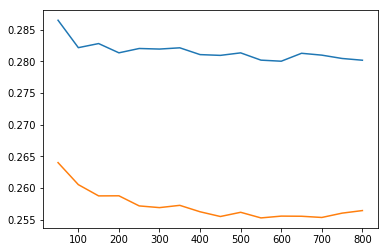

In [48]:
plt.plot( [i[ 0 ] for i in loss] , [ i[ 1 ] for i in loss ] ) 

plt.plot( [i[ 0 ] for i in loss] , [ i[ 2 ] for i in loss ] ) 

plt.show

In [49]:
 cboo = CatBoostClassifier( one_hot_max_size = 10, iterations = 50 )

In [50]:
cboo.fit( X_train , y_train , cat_features = categorical_features_indices ,verbose = False )

# Permutation based feature importance

In [53]:
def perm_feat_imp( mdl , X , y , metric ) :
    
    no_perm_mtr = metric( mdl , X , y )
    
    imp = []
    
    for col in X.columns:
        #copie de la colonne qui va être permutée
        save = X[ col ].copy()
        
        #permutation de la colonne
        X[ col ] = np.random.permutation( X[ col ] )
        
        #metric du modèle avec colonne permutée
        perm_mtr = metric( mdl , X , y )
        
        #dé permutation de la colonne
        X[ col ] = save
        
        #écart entre metric modèle avec colonne permutée et modèle sans permutation
        imp.append( perm_mtr - no_perm_mtr )
        
    return np.array(imp)

In [54]:
feat_imp = perm_feat_imp( cboo , X_test , y_test , log_loss )

C:\Users\FAB\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\FAB\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\FAB\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

C:\Users\FAB\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [60]:
df_feat_imp = pd.DataFrame( list( zip( X_test.columns , feat_imp ) ) , columns=[ 'feature' , 'importance' ] )

df_feat_imp = df_feat_imp.sort_values( by = 'importance' , ascending = False , inplace = False , kind = 'quicksort' , na_position = 'last' )

df_feat_imp

,feature,importance
10,capital-gain,0.153637
7,relationship,0.070144
0,age,0.061244
11,capital-loss,0.038759
4,education-num,0.032647
6,occupation,0.020741
5,marital-status,0.017280
12,hours-per-week,0.016928
1,workclass,0.004992
9,sex,0.003968


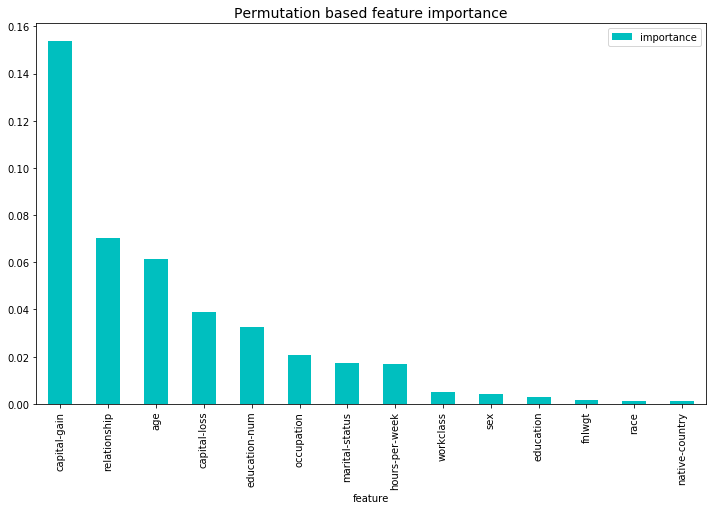

In [63]:
plt.rcParams[ 'figure.figsize' ] = ( 12 , 7 )

ax = df_feat_imp.plot( 'feature' , 'importance' , kind = 'bar' , color = 'c' )

ax.set_title( 'Permutation based feature importance' , fontsize = 14 )

ax.set_xlabel( 'feature' )

plt.show()